In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Optimizer
from tensorflow.keras.models import Sequential
from keras.callbacks import ModelCheckpoint

In [4]:
train=pd.read_csv("veriler\datathon\\train.csv")

In [191]:
sutunisimler=["tarih","urun","besin","kategori","fiyat","uretimyeri","market","sehir"]
train.columns=sutunisimler

In [192]:
train.tail()

,tarih,urun,besin,kategori,fiyat,uretimyeri,market,sehir
227515,2020-12-01,fındık,110,kuruyemiş,51.19,Yurt dışı,B,H
227516,2020-12-01,fıstık,115,kuruyemiş,55.14,Yurt dışı,B,H
227517,2020-12-01,kaju,100,kuruyemiş,58.60,Yurt dışı,B,H
227518,2020-12-01,badem,110,kuruyemiş,51.83,Yurt dışı,B,H
227519,2020-12-01,ceviz,120,kuruyemiş,57.22,Yurt dışı,B,H


In [193]:
train.head()

,tarih,urun,besin,kategori,fiyat,uretimyeri,market,sehir
0,2016-01-01,kıyma,120,et,33.41,Yurt içi,M,A
1,2016-01-01,tavuk,103,et,11.22,Yurt içi,M,A
2,2016-01-01,hindi,160,et,11.12,Yurt içi,M,A
3,2016-01-01,Bakla-kuru,354,sebze ve bakliyat,7.02,Yurt içi,M,A
4,2016-01-01,Bakla-taze,72,sebze ve bakliyat,13.14,Yurt içi,M,A


In [194]:
tarih2016=train.iloc[:45503,:]

In [195]:
tarih2017=train.iloc[45504:91008,:]

In [196]:
tarih2018=train.iloc[91008:136512,:]

In [197]:
tarih2019=train.iloc[136512:182016,:]

In [198]:
tarih2020=train.iloc[182016:,:]

In [199]:
one_hot = pd.get_dummies(tarih2016[['tarih','urun','kategori','uretimyeri','market','sehir']])
tarih2016 = tarih2016.drop(['tarih','urun','kategori','uretimyeri','market','sehir','besin'],axis = 1)

tarih2016 = tarih2016.join(one_hot)
tarih2016.rename(columns={'tarih_2016-01-01': 'ocak', 'tarih_2016-02-01': 'subat', 'tarih_2016-03-01': 'mart'
                         , 'tarih_2016-04-01': 'nisan', 'tarih_2016-05-01': 'mayis', 'tarih_2016-06-01': 'haziran'
                         , 'tarih_2016-07-01': 'temmuz', 'tarih_2016-08-01': 'agustos', 'tarih_2016-09-01': 'eylul'
                         , 'tarih_2016-10-01': 'ekim', 'tarih_2016-11-01': 'kasim', 'tarih_2016-12-01': 'aralik'}, inplace=True)

In [200]:
tarih2016.head()

,fiyat,ocak,subat,mart,nisan,mayis,haziran,temmuz,agustos,eylul,...,market_C,market_M,sehir_A,sehir_B,sehir_C,sehir_D,sehir_E,sehir_F,sehir_G,sehir_H
0,33.41,1,0,0,0,0,0,0,0,0,...,0,1,1,0,0,0,0,0,0,0
1,11.22,1,0,0,0,0,0,0,0,0,...,0,1,1,0,0,0,0,0,0,0
2,11.12,1,0,0,0,0,0,0,0,0,...,0,1,1,0,0,0,0,0,0,0
3,7.02,1,0,0,0,0,0,0,0,0,...,0,1,1,0,0,0,0,0,0,0
4,13.14,1,0,0,0,0,0,0,0,0,...,0,1,1,0,0,0,0,0,0,0


In [201]:
one_hot = pd.get_dummies(tarih2017[['tarih','urun','kategori','uretimyeri','market','sehir']])
tarih2017 = tarih2017.drop(['tarih','urun','kategori','uretimyeri','market','sehir','besin'],axis = 1)

tarih2017 = tarih2017.join(one_hot)
tarih2017.rename(columns={'tarih_2017-01-01': 'ocak', 'tarih_2017-02-01': 'subat', 'tarih_2017-03-01': 'mart'
                         , 'tarih_2017-04-01': 'nisan', 'tarih_2017-05-01': 'mayis', 'tarih_2017-06-01': 'haziran'
                         , 'tarih_2017-07-01': 'temmuz', 'tarih_2017-08-01': 'agustos', 'tarih_2017-09-01': 'eylul'
                         , 'tarih_2017-10-01': 'ekim', 'tarih_2017-11-01': 'kasim', 'tarih_2017-12-01': 'aralik'}, inplace=True)

In [202]:
tarih2017.head()

,fiyat,ocak,subat,mart,nisan,mayis,haziran,temmuz,agustos,eylul,...,market_C,market_M,sehir_A,sehir_B,sehir_C,sehir_D,sehir_E,sehir_F,sehir_G,sehir_H
45504,40.29,1,0,0,0,0,0,0,0,0,...,0,1,1,0,0,0,0,0,0,0
45505,14.32,1,0,0,0,0,0,0,0,0,...,0,1,1,0,0,0,0,0,0,0
45506,13.98,1,0,0,0,0,0,0,0,0,...,0,1,1,0,0,0,0,0,0,0
45507,8.30,1,0,0,0,0,0,0,0,0,...,0,1,1,0,0,0,0,0,0,0
45508,15.60,1,0,0,0,0,0,0,0,0,...,0,1,1,0,0,0,0,0,0,0


In [203]:
one_hot = pd.get_dummies(tarih2018[['tarih','urun','kategori','uretimyeri','market','sehir']])
tarih2018 = tarih2018.drop(['tarih','urun','kategori','uretimyeri','market','sehir','besin'],axis = 1)

tarih2018 = tarih2018.join(one_hot)
tarih2018.rename(columns={'tarih_2018-01-01': 'ocak', 'tarih_2018-02-01': 'subat', 'tarih_2018-03-01': 'mart'
                         , 'tarih_2018-04-01': 'nisan', 'tarih_2018-05-01': 'mayis', 'tarih_2018-06-01': 'haziran'
                         , 'tarih_2018-07-01': 'temmuz', 'tarih_2018-08-01': 'agustos', 'tarih_2018-09-01': 'eylul'
                         , 'tarih_2018-10-01': 'ekim', 'tarih_2018-11-01': 'kasim', 'tarih_2018-12-01': 'aralik'}, inplace=True)

In [204]:
tarih2018.head()

,fiyat,ocak,subat,mart,nisan,mayis,haziran,temmuz,agustos,eylul,...,market_C,market_M,sehir_A,sehir_B,sehir_C,sehir_D,sehir_E,sehir_F,sehir_G,sehir_H
91008,48.24,1,0,0,0,0,0,0,0,0,...,0,1,1,0,0,0,0,0,0,0
91009,18.43,1,0,0,0,0,0,0,0,0,...,0,1,1,0,0,0,0,0,0,0
91010,17.99,1,0,0,0,0,0,0,0,0,...,0,1,1,0,0,0,0,0,0,0
91011,10.17,1,0,0,0,0,0,0,0,0,...,0,1,1,0,0,0,0,0,0,0
91012,19.52,1,0,0,0,0,0,0,0,0,...,0,1,1,0,0,0,0,0,0,0


In [205]:
one_hot = pd.get_dummies(tarih2019[['tarih','urun','kategori','uretimyeri','market','sehir']])
tarih2019 = tarih2019.drop(['tarih','urun','kategori','uretimyeri','market','sehir','besin'],axis = 1)

tarih2019 = tarih2019.join(one_hot)
tarih2019.rename(columns={'tarih_2019-01-01': 'ocak', 'tarih_2019-02-01': 'subat', 'tarih_2019-03-01': 'mart'
                         , 'tarih_2019-04-01': 'nisan', 'tarih_2019-05-01': 'mayis', 'tarih_2019-06-01': 'haziran'
                         , 'tarih_2019-07-01': 'temmuz', 'tarih_2019-08-01': 'agustos', 'tarih_2019-09-01': 'eylul'
                         , 'tarih_2019-10-01': 'ekim', 'tarih_2019-11-01': 'kasim', 'tarih_2019-12-01': 'aralik'}, inplace=True)

In [206]:
tarih2019.head()

,fiyat,ocak,subat,mart,nisan,mayis,haziran,temmuz,agustos,eylul,...,market_C,market_M,sehir_A,sehir_B,sehir_C,sehir_D,sehir_E,sehir_F,sehir_G,sehir_H
136512,69.75,1,0,0,0,0,0,0,0,0,...,0,1,1,0,0,0,0,0,0,0
136513,25.64,1,0,0,0,0,0,0,0,0,...,0,1,1,0,0,0,0,0,0,0
136514,26.70,1,0,0,0,0,0,0,0,0,...,0,1,1,0,0,0,0,0,0,0
136515,14.52,1,0,0,0,0,0,0,0,0,...,0,1,1,0,0,0,0,0,0,0
136516,25.40,1,0,0,0,0,0,0,0,0,...,0,1,1,0,0,0,0,0,0,0


In [207]:
one_hot = pd.get_dummies(tarih2020[['tarih','urun','kategori','uretimyeri','market','sehir']])
tarih2020 = tarih2020.drop(['tarih','urun','kategori','uretimyeri','market','sehir','besin'],axis = 1)

tarih2020 = tarih2020.join(one_hot)
tarih2020.rename(columns={'tarih_2020-01-01': 'ocak', 'tarih_2020-02-01': 'subat', 'tarih_2020-03-01': 'mart'
                         , 'tarih_2020-04-01': 'nisan', 'tarih_2020-05-01': 'mayis', 'tarih_2020-06-01': 'haziran'
                         , 'tarih_2020-07-01': 'temmuz', 'tarih_2020-08-01': 'agustos', 'tarih_2020-09-01': 'eylul'
                         , 'tarih_2020-10-01': 'ekim', 'tarih_2020-11-01': 'kasim', 'tarih_2020-12-01': 'aralik'}, inplace=True)

In [208]:
tarih2020.tail()

,fiyat,ocak,subat,mart,nisan,mayis,haziran,temmuz,agustos,eylul,...,market_C,market_M,sehir_A,sehir_B,sehir_C,sehir_D,sehir_E,sehir_F,sehir_G,sehir_H
227515,51.19,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
227516,55.14,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
227517,58.60,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
227518,51.83,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
227519,57.22,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [209]:
y2016=tarih2016.iloc[:,0:1]
x2016=tarih2016.drop(['fiyat'],axis = 1)

In [210]:
y2017=tarih2017.iloc[:,0:1]
x2017=tarih2017.drop(['fiyat'],axis = 1)

In [211]:
y2018=tarih2018.iloc[:,0:1]
x2018=tarih2018.drop(['fiyat'],axis = 1)

In [212]:
y2019=tarih2019.iloc[:,0:1]
x2019=tarih2019.drop(['fiyat'],axis = 1)

In [213]:
y2020=tarih2020.iloc[:,0:1]
x2020=tarih2020.drop(['fiyat'],axis = 1)

In [214]:
model=Sequential()
model.add(Dense(128,activation="relu"))
model.add(Dense(128,activation="relu"))
model.add(Dense(256,activation="relu"))
model.add(Dense(256,activation="relu"))
model.add(Dense(128,activation="relu"))
model.add(Dense(128,activation="relu"))
model.add(Dense(128,activation="relu"))
model.add(Dense(1))

In [215]:
model.compile(optimizer="Adam",loss="mse")

In [228]:
x_train,x_test,y_train,y_test=train_test_split(x2020,y2020,test_size=0.33,random_state=0)

In [229]:
scaler = MinMaxScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [230]:
model.fit(x_train,y_train,epochs=50,validation_split=0.1)

Epoch 1/50
858/858 [==============================] - 10s 11ms/step - loss: 1.4823 - val_loss: 0.6195
Epoch 2/50
858/858 [==============================] - 8s 10ms/step - loss: 0.5351 - val_loss: 0.4850
Epoch 3/50
858/858 [==============================] - 9s 10ms/step - loss: 0.4332 - val_loss: 0.4797
Epoch 4/50
858/858 [==============================] - 8s 10ms/step - loss: 0.3791 - val_loss: 0.5442
Epoch 5/50
858/858 [==============================] - 12s 14ms/step - loss: 0.3488 - val_loss: 0.3435
Epoch 6/50
858/858 [==============================] - 8s 9ms/step - loss: 0.3393 - val_loss: 0.4001
Epoch 7/50
858/858 [==============================] - 7s 8ms/step - loss: 0.2916 - val_loss: 0.3412
Epoch 8/50
858/858 [==============================] - 7s 8ms/step - loss: 0.2920 - val_loss: 0.3864
Epoch 9/50
858/858 [==============================] - 7s 8ms/step - loss: 0.2648 - val_loss: 0.3277
Epoch 10/50
858/858 [==============================] - 7s 8ms/step - loss: 0.2532 - val_loss:

<AxesSubplot:>

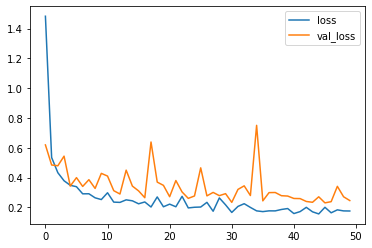

In [231]:
history=pd.DataFrame(model.history.history)
history.plot()

In [232]:
model.evaluate(x_test,y_test)

470/470 [==============================] - 2s 3ms/step - loss: 0.2404


0.24040156602859497

In [233]:
model.save('veriler\datathon\models\\datathon4')

INFO:tensorflow:Assets written to: veriler\datathon\models\datathon4\assets


In [234]:
new_model = tf.keras.models.load_model('veriler\datathon\\asil')

In [2]:
test=pd.read_csv("veriler\datathon\\testFeatures.csv")

In [243]:
test=test.drop('id',axis=1)

In [244]:
sutunisimler=["tarih","urun","besin","kategori","uretimyeri","market","sehir"]
test.columns=sutunisimler

In [245]:
one_hot = pd.get_dummies(test[['tarih','urun','kategori','uretimyeri','market','sehir']])
test = test.drop(['tarih','urun','kategori','uretimyeri','market','sehir','besin'],axis = 1)

test = test.join(one_hot)
test.rename(columns={'tarih_2021-01-01': 'ocak', 'tarih_2021-02-01': 'subat', 'tarih_2021-03-01': 'mart'
                        , 'tarih_2021-04-01': 'nisan', 'tarih_2021-05-01': 'mayis', 'tarih_2021-06-01': 'haziran'
                        , 'tarih_2021-07-01': 'temmuz', 'tarih_2021-08-01': 'agustos', 'tarih_2021-09-01': 'eylul'
                        , 'tarih_2021-10-01': 'ekim', 'tarih_2021-11-01': 'kasim', 'tarih_2021-12-01': 'aralik'}, inplace=True)

In [246]:
test.head(-5)

,ocak,subat,mart,nisan,mayis,haziran,temmuz,agustos,eylul,ekim,...,market_C,market_M,sehir_A,sehir_B,sehir_C,sehir_D,sehir_E,sehir_F,sehir_G,sehir_H
0,1,0,0,0,0,0,0,0,0,0,...,0,1,1,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,1,1,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,1,1,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,1,1,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,1,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45494,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
45495,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
45496,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
45497,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [247]:
scaler = MinMaxScaler()
scaler.fit(test)
test = scaler.transform(test)

In [248]:
testTahminleri=new_model.predict(test)
len(testTahminleri)

45504

In [249]:
testTahminleri= pd.Series(testTahminleri.reshape(45504,))

In [250]:
testTahminleri.to_csv('veriler\datathon\sonuclar\\datathon42.csv')

In [251]:
deneme=pd.read_csv('veriler\datathon\sonuclar\\datathon42.csv')

In [252]:
sutunisimler=["id","ürün fiyatı"]
deneme.columns=sutunisimler

In [253]:
deneme.to_csv('veriler\datathon\sonuclar\\datathon4.csv',index=False)

In [6]:
test.head(-5)

,id,tarih,ürün,ürün besin değeri,ürün kategorisi,ürün üretim yeri,market,şehir
0,0,2021-01-01,kıyma,120,et,Yurt içi,M,A
1,1,2021-01-01,tavuk,103,et,Yurt içi,M,A
2,2,2021-01-01,hindi,160,et,Yurt içi,M,A
3,3,2021-01-01,Bakla-kuru,354,sebze ve bakliyat,Yurt içi,M,A
4,4,2021-01-01,Bakla-taze,72,sebze ve bakliyat,Yurt içi,M,A
...,...,...,...,...,...,...,...,...
45494,45494,2021-12-01,Nar,77,meyve,Yurt dışı,B,H
45495,45495,2021-12-01,Portakal,41,meyve,Yurt dışı,B,H
45496,45496,2021-12-01,Şeftali,49,meyve,Yurt dışı,B,H
45497,45497,2021-12-01,Üzüm,74,meyve,Yurt dışı,B,H


In [8]:
train.head(-5)

,tarih,ürün,ürün besin değeri,ürün kategorisi,ürün fiyatı,ürün üretim yeri,market,şehir
0,2016-01-01,kıyma,120,et,33.41,Yurt içi,M,A
1,2016-01-01,tavuk,103,et,11.22,Yurt içi,M,A
2,2016-01-01,hindi,160,et,11.12,Yurt içi,M,A
3,2016-01-01,Bakla-kuru,354,sebze ve bakliyat,7.02,Yurt içi,M,A
4,2016-01-01,Bakla-taze,72,sebze ve bakliyat,13.14,Yurt içi,M,A
...,...,...,...,...,...,...,...,...
227510,2020-12-01,Nar,77,meyve,26.24,Yurt dışı,B,H
227511,2020-12-01,Portakal,41,meyve,14.20,Yurt dışı,B,H
227512,2020-12-01,Şeftali,49,meyve,15.16,Yurt dışı,B,H
227513,2020-12-01,Üzüm,74,meyve,16.22,Yurt dışı,B,H
